Ardiyanti Widyadana Prastuti

In [ ]:
# multiclass on text classification
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# me-load dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/coba/test1.csv')
#df = df.drop(columns=['text', 'date'])

df

,Review,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
24995,"For one thing, he produced this movie. It has ...",neg
24996,The title comes from an alteration an adolesce...,pos
24997,Christopher Nolan's first film is a 'no budget...,pos
24998,The story is shortly about the faith-lacking b...,neg


In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.91):
      print("\nTraning data berhenti, tingkat akurasi > 91%")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# on encoding

category = pd.get_dummies(df.sentiment)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='sentiment')
df_baru

,Review,neg,pos
0,"My daughter liked it but I was aghast, that a ...",1,0
1,I... No words. No words can describe this. I w...,1,0
2,this film is basically a poor take on the old ...,1,0
3,"This is a terrible movie, and I'm not even sur...",1,0
4,First of all this movie is a piece of reality ...,0,1
...,...,...,...
24995,"For one thing, he produced this movie. It has ...",1,0
24996,The title comes from an alteration an adolesce...,0,1
24997,Christopher Nolan's first film is a 'no budget...,0,1
24998,The story is shortly about the faith-lacking b...,1,0


In [ ]:
# on split dataframe
review = df_baru['Review'].values
label = df_baru[['neg', 'pos']].values

review

array(['My daughter liked it but I was aghast, that a character in this movie smokes. As if it isn\'t awful enough to see "product placement" actors like Bruce Willis who smoke in their movies - at least children movies should be more considerate! I wonder: was that intentional? Did big tobacco "sponsor" the film? What does it take to ban smoking from films? At least films intended for children and adolescents. My daughter liked it but I was aghast, that a character in this movie smokes. As if it isn\'t awful enough to see "product placement" actors like Bruce Willis who smoke in their movies - at least children movies should be more considerate! I wonder: was that intentional? Did big tobacco "sponsor" the film? What does it take to ban smoking from films? At least films intended for children and adolescents.',
       "I... No words. No words can describe this. I will try for the sake of those few brave people who stick knives into their toasters... after watching this show.<br /><br 

In [ ]:
# view label array
label

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

text = df_baru['Review'].values
y = df_baru[['neg', 'pos']].values
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size = 0.2)

In [ ]:
#tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# on tokenizer
tokenizer = Tokenizer(num_words = 280617, oov_token = '-')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

# on sequences
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

# on padding
pad_train = pad_sequences(seq_train, maxlen = 300, padding = 'post', truncating = 'post')

pad_test = pad_sequences(seq_test, maxlen = 300, padding = 'post', truncating = 'post')

In [ ]:
# on embedding
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = Sequential([layers.Embedding(280617, 64, input_length = 300),
                    layers.LSTM(64, dropout = 0.1),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(64, activation = 'relu'),
                    layers.Dense(2, activation = 'sigmoid')
                    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           17959488  
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 18,009,218
Trainable params: 18,009,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# on model training
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(pad_train, 
                    y_train, 
                    batch_size = 128, 
                    epochs = 30,
                    validation_data = (pad_test, y_test),
                    verbose = 2,
                    callbacks = [callbacks])

Epoch 1/30
157/157 - 95s - loss: 0.6928 - accuracy: 0.5078 - val_loss: 0.6987 - val_accuracy: 0.5080 - 95s/epoch - 607ms/step
Epoch 2/30
157/157 - 93s - loss: 0.6490 - accuracy: 0.5760 - val_loss: 0.7062 - val_accuracy: 0.5634 - 93s/epoch - 595ms/step
Epoch 3/30
157/157 - 90s - loss: 0.5971 - accuracy: 0.6696 - val_loss: 0.5118 - val_accuracy: 0.7780 - 90s/epoch - 574ms/step
Epoch 4/30
157/157 - 90s - loss: 0.5740 - accuracy: 0.6657 - val_loss: 0.6929 - val_accuracy: 0.5342 - 90s/epoch - 570ms/step
Epoch 5/30
157/157 - 89s - loss: 0.5496 - accuracy: 0.6781 - val_loss: 0.4942 - val_accuracy: 0.8110 - 89s/epoch - 568ms/step
Epoch 6/30
157/157 - 89s - loss: 0.4634 - accuracy: 0.7954 - val_loss: 0.5563 - val_accuracy: 0.7580 - 89s/epoch - 568ms/step
Epoch 7/30
157/157 - 89s - loss: 0.4307 - accuracy: 0.8271 - val_loss: 0.5470 - val_accuracy: 0.8072 - 89s/epoch - 568ms/step
Epoch 8/30
157/157 - 90s - loss: 0.5280 - accuracy: 0.6730 - val_loss: 0.7392 - val_accuracy: 0.5708 - 90s/epoch - 571

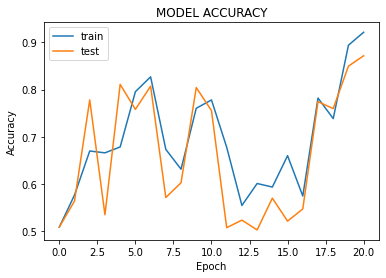

In [ ]:
# onmodel accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

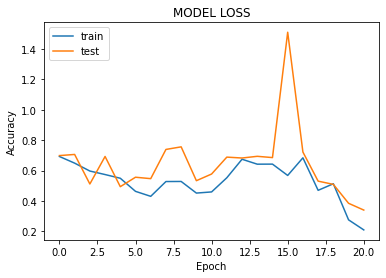

In [ ]:
# on model loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()